In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Make dataset

In [2]:
from mvae.utils.toy_dataset_maker import ToyDatasetMaker

In [49]:
maker = ToyDatasetMaker(40, 40, 32, 1, 6, 3)

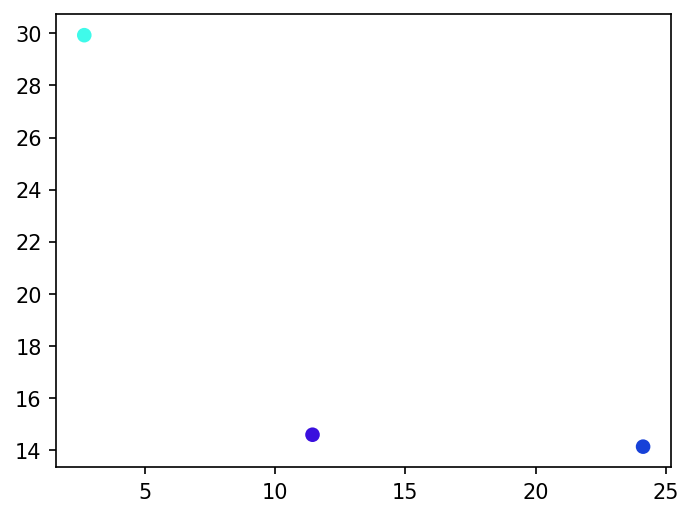

In [50]:
plt.figure(dpi=150)
points = maker._centers
colors = maker._colors
plt.scatter(points[:, 0], points[:, 1], c=colors / 255)
plt.gca().set_aspect("equal")

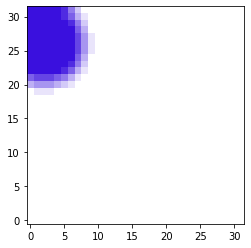

In [51]:
image = maker.get_image(np.array([1, 1, -np.pi / 2]))
plt.imshow(image, origin="low")

In [52]:
trajectory = maker.make_random_trajectory(1024)

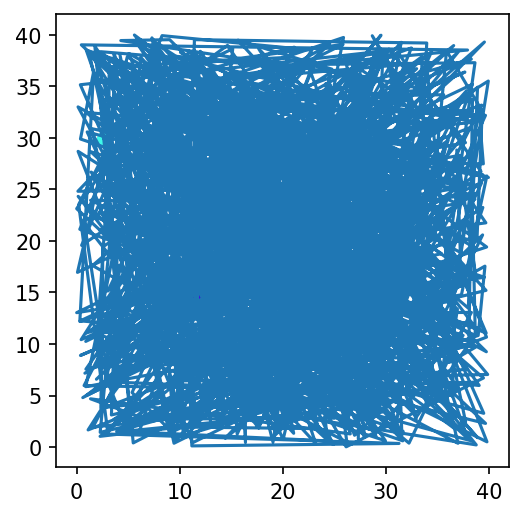

In [53]:
plt.figure(dpi=150)
points = maker._centers
colors = maker._colors
plt.scatter(points[:, 0], points[:, 1], c=colors / 255)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect("equal")

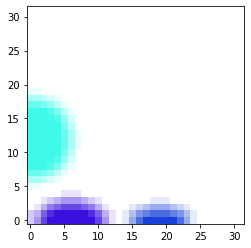

In [55]:
image = maker.get_image(trajectory[3])
plt.imshow(image, origin="low")

# Rotate angle

In [56]:
def rotate_data_point(image, angle):
    angle_delta = np.random.random() * 2 * np.pi
    angle = angle + angle_delta
    angle_delta = angle_delta / np.pi * 180
    matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle_delta, 1)
    image = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]), borderValue=(255, 255, 255))
    return image, angle

In [57]:
position = trajectory[30]
image = maker.get_image(position)
image1, angle = rotate_data_point(image, position[2])
image2 = maker.get_image(np.array([position[0], position[1],  angle]))

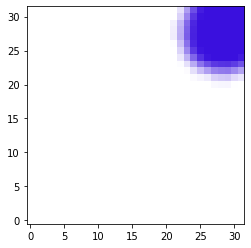

In [58]:
plt.imshow(image1, origin="low")

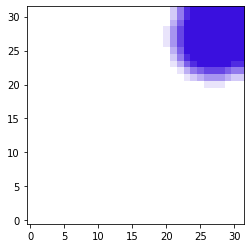

In [59]:
plt.imshow(image2, origin="low")

# Save dataset

In [60]:
maker.save_dataset("three_point_dataset1.npz", 0.05, 4096, "random")

In [31]:
maker._centers

array([[2.78708353, 1.94157657],
       [0.71208949, 3.50047436],
       [0.07094167, 2.39465481]])